In [1]:
"""
file: q2.py
description: Create a logistic model using pytorch on the 2 frogs datasets

language: python3
author: Prakhar Gupta pg9349

"""



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import torch
import torch.nn as nn
import numpy as np
### Setting the seed for reproducibity 
torch.manual_seed(0)

In [2]:
df_sample=pd.read_csv("Frogs-subsample.csv")

In [3]:
df_sample.columns
df_sample = df_sample.sample(frac=1,random_state=42).reset_index(drop=True)

In [4]:
trainpercent=0.80
df_sample['Species_encoded']=df_sample.Species.map({"HypsiboasCinerascens":0,"HylaMinuta":1})
train=df_sample.sample(frac=trainpercent,random_state=102) #random state is a seed value
test=df_sample.drop(train.index)


In [5]:
train.shape,test.shape

((40, 4), (10, 4))

In [6]:
X_train=train[['MFCCs_10', 'MFCCs_17']].to_numpy()

y_train=train[['Species_encoded']].to_numpy()
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))


X_test=test[['MFCCs_10', 'MFCCs_17']].to_numpy()

y_test=test[['Species_encoded']].to_numpy()
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
                           

In [7]:
df_sample.columns

Index(['MFCCs_10', 'MFCCs_17', 'Species', 'Species_encoded'], dtype='object')

In [8]:

class GLm(torch.nn.Module):
    """
    Class to inherit pytorch module
    """
    def __init__(self, inpdim=2, outdim=1):
        super(GLm, self).__init__()
        self.linear = torch.nn.Linear(inpdim, outdim)
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [9]:
logistic=GLm(2,1)

In [10]:
learning_rate = 0.01                               
criterion = nn.BCELoss()
passes=2000
optimizer = torch.optim.SGD(logistic.parameters(), lr=learning_rate)

In [11]:
for epoch in range(passes):
#     print(epoch)
    y_pred = logistic(X_train)
    loss = criterion(y_pred, y_train)             
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 100 == 0:                                         
       
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 100, loss = 0.6840
epoch: 200, loss = 0.6724
epoch: 300, loss = 0.6626
epoch: 400, loss = 0.6540
epoch: 500, loss = 0.6462
epoch: 600, loss = 0.6389
epoch: 700, loss = 0.6319
epoch: 800, loss = 0.6253
epoch: 900, loss = 0.6189
epoch: 1000, loss = 0.6127
epoch: 1100, loss = 0.6066
epoch: 1200, loss = 0.6007
epoch: 1300, loss = 0.5949
epoch: 1400, loss = 0.5892
epoch: 1500, loss = 0.5837
epoch: 1600, loss = 0.5783
epoch: 1700, loss = 0.5730
epoch: 1800, loss = 0.5677
epoch: 1900, loss = 0.5626
epoch: 2000, loss = 0.5576


In [12]:
print("Training Accuarcy")
y_predicted = logistic(X_train)
y_predicted_cls = y_predicted.round()
acc = y_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])
print(f'accuracy: {acc.item():.4f}')

Training Accuarcy
accuracy: 0.9500


In [13]:
print("Test Accuarcy")
y_predicted = logistic(X_test)
y_predicted_cls = y_predicted.round()
acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy: {acc.item():.4f}')

Test Accuarcy
accuracy: 0.9000


In [14]:
logistic.linear

Linear(in_features=2, out_features=1, bias=True)

In [15]:
l = logistic.state_dict()
w1,w2=np.array(l['linear.weight'])[0]
w0=np.array(l['linear.bias'])[0]

In [16]:
c=-(w0/w2)
m=-(w1/w2)

In [17]:
x1min,x1max=df_sample["MFCCs_10"].min(),df_sample["MFCCs_10"].max()
x2min,x2max=df_sample["MFCCs_17"].min(),df_sample["MFCCs_17"].max()

xd = np.array([x1min, x1max])
yd = m*xd + c

In [18]:
x1min,x1max

(-0.43424536700000005, 0.33757943700000004)

In [19]:
xd,yd

(array([-0.43424537,  0.33757944]), array([ 0.91006337, -0.43610717]))

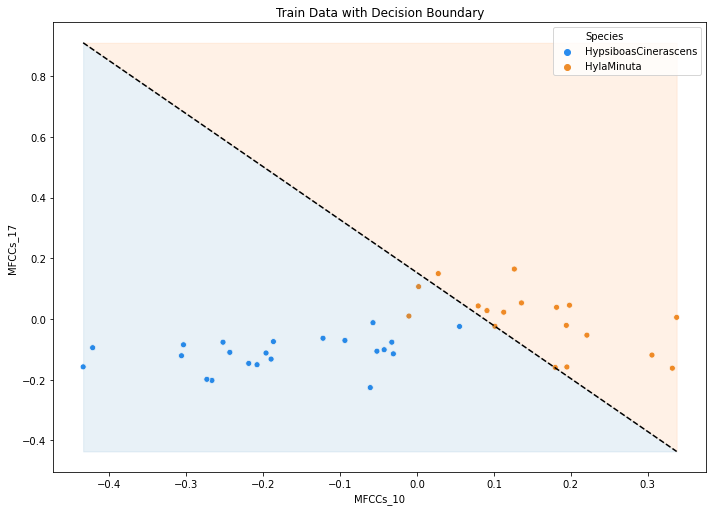

In [20]:
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=train, x="MFCCs_10", y="MFCCs_17",hue='Species',palette=dict(HypsiboasCinerascens="#298CEE", HylaMinuta="#EE8C29"))
plt.plot(xd, yd, 'k', lw=1.5, ls='--')
plt.fill_between(xd, yd, min(yd), color='tab:blue', alpha=0.1)
plt.fill_between(xd, yd, max(yd), color='tab:orange', alpha=0.1)
plt.title("Train Data with Decision Boundary")
plt.show()

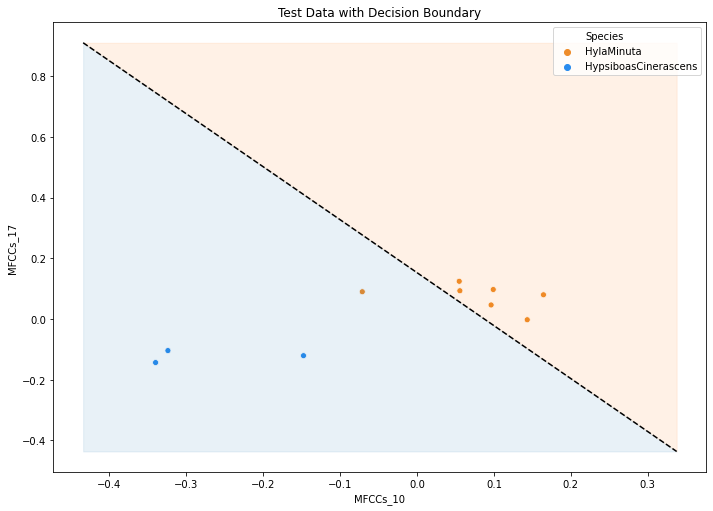

In [21]:
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=test, x="MFCCs_10", y="MFCCs_17",hue='Species',palette=dict(HypsiboasCinerascens="#298CEE", HylaMinuta="#EE8C29"))
plt.plot(xd, yd, 'k', lw=1.5, ls='--')
plt.fill_between(xd, yd, min(yd), color='tab:blue', alpha=0.1)
plt.fill_between(xd, yd, max(yd), color='tab:orange', alpha=0.1)
plt.title("Test Data with Decision Boundary")
plt.show()

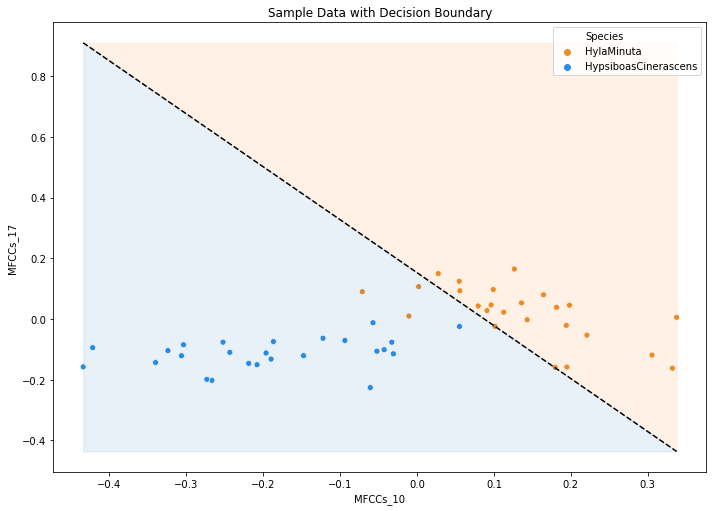

In [22]:
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=df_sample, x="MFCCs_10", y="MFCCs_17",hue='Species',palette=dict(HypsiboasCinerascens="#298CEE", HylaMinuta="#EE8C29"))
plt.plot(xd, yd, 'k', lw=1.5, ls='--')
plt.fill_between(xd, yd, min(yd), color='tab:blue', alpha=0.1)
plt.fill_between(xd, yd, max(yd), color='tab:orange', alpha=0.1)
plt.title("Sample Data with Decision Boundary")
plt.show()

In [23]:
df=pd.read_csv("Frogs.csv")

In [24]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True)

In [25]:
trainpercent=0.80
df['Species_encoded']=df.Species.map({"HypsiboasCinerascens":0,"HylaMinuta":1})
train=df.sample(frac=trainpercent,random_state=102) #random state is a seed value
test=df.drop(train.index)


In [26]:


X_train=train[['MFCCs_10', 'MFCCs_17']].to_numpy()

y_train=train[['Species_encoded']].to_numpy()
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))


X_test=test[['MFCCs_10', 'MFCCs_17']].to_numpy()

y_test=test[['Species_encoded']].to_numpy()
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
                           
                           

In [27]:
logistic_completedata=GLm(2,1)

In [28]:
learning_rate = 0.01                               
criterion = nn.BCELoss()
passes=8000
optimizer = torch.optim.SGD(logistic_completedata.parameters(), lr=learning_rate)

for epoch in range(passes):
#     print(epoch)
    y_pred = logistic_completedata(X_train)
    loss = criterion(y_pred, y_train)             
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 500 == 0:                                         
       
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 500, loss = 0.6783
epoch: 1000, loss = 0.6369
epoch: 1500, loss = 0.6042
epoch: 2000, loss = 0.5755
epoch: 2500, loss = 0.5499
epoch: 3000, loss = 0.5271
epoch: 3500, loss = 0.5067
epoch: 4000, loss = 0.4885
epoch: 4500, loss = 0.4720
epoch: 5000, loss = 0.4572
epoch: 5500, loss = 0.4437
epoch: 6000, loss = 0.4315
epoch: 6500, loss = 0.4204
epoch: 7000, loss = 0.4102
epoch: 7500, loss = 0.4009
epoch: 8000, loss = 0.3924


In [29]:
print("Training Accuracy")
y_predicted = logistic_completedata(X_train)
y_predicted_cls = y_predicted.round()
acc = y_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])
print(f'accuracy: {acc.item():.4f}')

Training Accuracy
accuracy: 0.9153


In [30]:
print("Test Accuracy")
y_predicted = logistic(X_test)
y_predicted_cls = y_predicted.round()
acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy: {acc.item():.4f}')

Test Accuracy
accuracy: 0.9103


In [31]:
l = logistic_completedata.state_dict()
w1,w2=np.array(l['linear.weight'])[0]
w0=np.array(l['linear.bias'])[0]


c=-(w0/w2)
m=-(w1/w2)

x1min,x1max=df["MFCCs_10"].min(),df["MFCCs_10"].max()
x2min,x2max=df["MFCCs_17"].min(),df["MFCCs_17"].max()

xd = np.array([x1min, x1max])
yd = m*xd + c


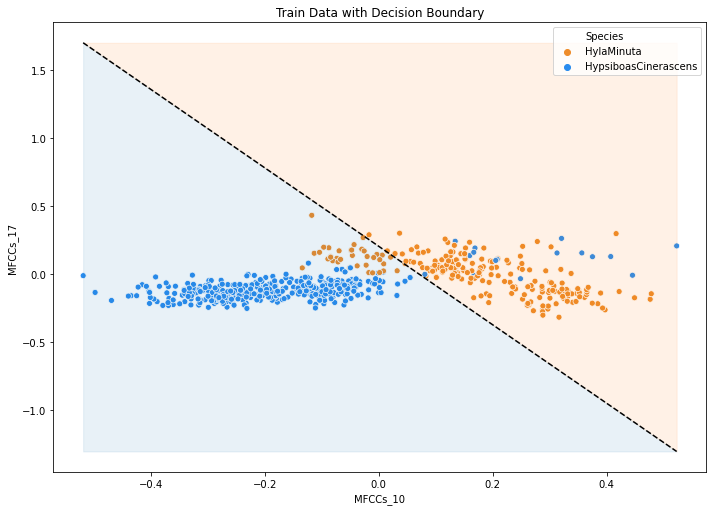

In [32]:
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=train, x="MFCCs_10", y="MFCCs_17",hue='Species',palette=dict(HypsiboasCinerascens="#298CEE", HylaMinuta="#EE8C29"))
plt.plot(xd, yd, 'k', lw=1.5, ls='--')
plt.fill_between(xd, yd, min(yd), color='tab:blue', alpha=0.1)
plt.fill_between(xd, yd, max(yd), color='tab:orange', alpha=0.1)
plt.title("Train Data with Decision Boundary")
plt.show()

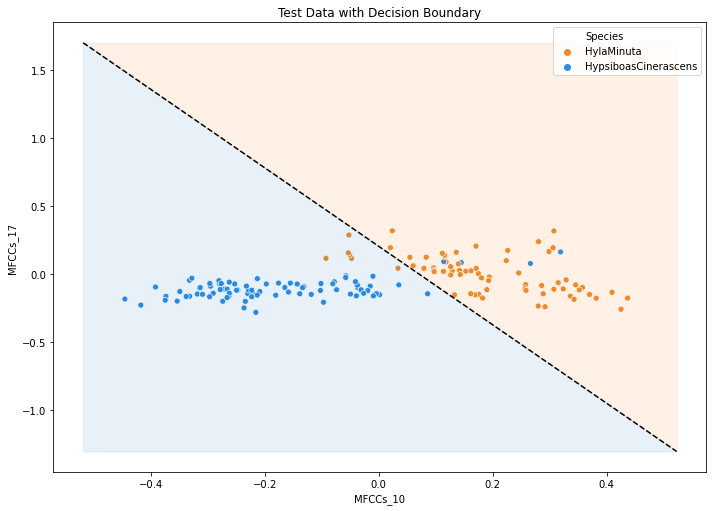

In [33]:
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=test, x="MFCCs_10", y="MFCCs_17",hue='Species',palette=dict(HypsiboasCinerascens="#298CEE", HylaMinuta="#EE8C29"))
plt.plot(xd, yd, 'k', lw=1.5, ls='--')
plt.fill_between(xd, yd, min(yd), color='tab:blue', alpha=0.1)
plt.fill_between(xd, yd, max(yd), color='tab:orange', alpha=0.1)
plt.title("Test Data with Decision Boundary")
plt.show()

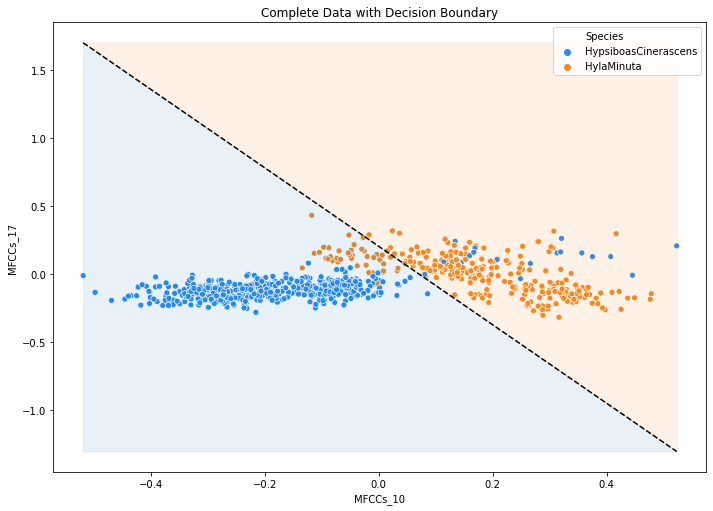

In [34]:
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=df, x="MFCCs_10", y="MFCCs_17",hue='Species',palette=dict(HypsiboasCinerascens="#298CEE", HylaMinuta="#EE8C29"))
plt.plot(xd, yd, 'k', lw=1.5, ls='--')
plt.fill_between(xd, yd, min(yd), color='tab:blue', alpha=0.1)
plt.fill_between(xd, yd, max(yd), color='tab:orange', alpha=0.1)
plt.title("Complete Data with Decision Boundary")
plt.show()